# Logistic Regression

last updated 20191126TUE1106

## S.1 목차

* S.2 문제의 이해
* S.3 그래프
* S.3.1 로그
* S.3.2 Logit
* S.3.3 승수
* S.4 로지스틱 회귀
* S.4.1 확률
* S.4.2 분류기준
* S.5 예제
* S.5.1 데이터 읽기
* S.5.2 입력변수 x, 종속변수 y
* S.5.3 로지스틱 모델링
* 문제: 파일을 읽고 로지스틱 함수 그래프
* S.6 Gradient
* S.6.1 Cost
* S.6.2 입력변수 x, 종속변수 y
* S.6.3 h(x) 함수
* S.6.4 weights
* S.6.5 gradient 계산
* S.6.6 update
* 문제: 입력변수 2개인 로지스틱 회귀 -> 정리 필요
* 문제: horse-colic -> 정리 필요
* 문제: 입학
* 문제: statsmodels datasets를 이용한 간단한 OLS 예제 -> 정리 필요
* 문제: Spark -> 정리 필요
* 문제: 성별
* 문제: Titanic case

python
http://stackoverflow.com/questions/22054964/ols-regression-scikit-vs-statsmodels
* statsmodels OLS
* scikit-learn LinearRegression

http://blog.yhathq.com/posts/logistic-regression-and-python.html
* get_dummies
* add_constant This appends a column of ones to an array if prepend==False.

## S.2 문제의 이해

로지스틱 회귀는 발생할 수 있는 결과 값이 이진인 경우의 분류에 적용한다.
환자의 데이터로부터 사망 또는 생존, 이메일이 스팸인지 아닌지 또는 거래가 정상인지 아닌지
어떤 사건이 일어날 확률을 알고 있고 **이진 분류**를 하는 경우에 사용한다.
결과 값이 **이항분포**이므로 **GLM** Generalized Linear Model의 한 종류이고, 이 경우 Logit 함수를 **link function**이라고 한다.

이진분류에 사용하지만, multinomial, ordered에 확장할 수 있다 (Newton's Method).

입력변수와 목표변수 간의 관계를 도출하는 것은 여느 회귀분석과 다르지 않다.
**회귀식**의 종속변수는 **예측 값**이지만, **로지스틱 회귀식**에서의 종속변수는 **로그 승수log odds**이다.

로지스틱 회귀식은 입력 값을 받아서 0 ~ 1 사이의 확률을 반환한다.
그렇다면 어떻게 0 ~ 1사이의 값을 만들어 낼까? sigmoid함수를 사용해서 그렇게 한다.

## S.3 그래프

### S.3.1 로그

아래 **로그 그래프**를 보면,
이진분류를 하기 위해 확률에 로그를 그냥 취하면 그 결과가 0과 1로 나오지 않는다.
**0**을 포함해서 **음수 x**에 대해 log(x)는 무한값 또는 계산할 수 없다.

In [1]:
import numpy as np
print "log of x= 0:", np.log(1)
print "log 0: ",np.log(0)
print "log negative: ",np.log(-1)

log of x= 0: 0.0
log 0:  -inf
log negative:  nan


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log


### S.3.2 Logit

아래 **로짓 그래프**를 보면,
로짓함수는 승수에 e밑으로 자연로그를 취해서 **log odds**구한다.
* 0,1의 결과를 smoothing한다. **확률**적인 값으로 활용하기 편리하다.
로짓함수를 사용하여 확률을 변환하면 **0,1 사이의 값**을 얻을 수 있다.
log odds로 변환하는 이유는 **이진으로 분류**하기 때문이다.
logistic(sigmoid)함수를 사용해서 확률을 강제적으로 0 또는 1로 이진분류한다.
sigmoid는 x=0일 경우, 0.5 값이 된다. 최소 0부터 최대 1까지의 범위를 가진다.
$$Y =logit(p) = log\frac{p}{1-p} \in \{1, 0\}$$

In [216]:
sigmoid=lambda(x):1.0/(1+np.exp(-x))
print "logit -100: {0:.3f}".format(sigmoid(-100))
print "sigmoid of x=-1:", sigmoid(-1)
print "logit    0: {0:.3f}".format(sigmoid(0))
print "sigmoid of x= 1:", sigmoid(1)
print "logit  100: {0:.3f}".format(sigmoid(100))

logit -100: 0.000
sigmoid of x=-1: 0.26894142137
logit    0: 0.500
sigmoid of x= 1: 0.73105857863
logit  100: 1.000


### S.3.3 승수

승수 Odds는 $\frac{p}{1-p}$이다.
확률이나 승수는 일반적으로 같은 의미로 사용되기도 하지만 수학적으로 두 용어는 다른 의미이다.
**확률**은 특정 사건이 발생할 백분율이므로 주사위 1이 나올 확률은 $p = \frac{1}{6}$이다.
반면에 **odds 승수**는 확률이 p인 경우 $odds = \frac{p}{1-p}$, 주사위 1에 대한 계산하면, $\frac{ \frac{1}{6} } { 1-\frac{1}{6}} = \frac{1}{5}$ 1:5이다. 즉 **6번에 1번은 이기지만 5번은 지는** 것을 의미한다.

동전 던지기의 확률은 0.5이다. 승수 **$odds = \frac{0.5}{1-0.5}$**, 즉 **2번에 1번은 이기지만 1번은 지는** 것을 의미한다. 


In [3]:
odds=lambda(x):x/(1-x)
print "odds 0: {0:.3f}".format(odds(0))
print "odds 1/6: {0:.3f}".format(odds(1/6.))
print "odds 0.5: {0:.3f}".format(odds(0.5))

odds 0: 0.000
odds 1/6: 0.200
odds 0.5: 1.000
odds 0.7: 2.333


그래프로 sigmoid함수가 어떻게 exponential, log, 확률과 다른지 살펴보자.
그래프는 행2, 열2 모두 4개를 각 각 221, 222, 223, 224로 배치한다.
**sigmoid함수는 0일 때 0.5**이고, 이을 기준으로 'S'자 곡선을 보여주고 있다.

In [2]:
x=np.arange(-5,5,0.05)
#x=np.array([0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,
#            3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50])

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in log


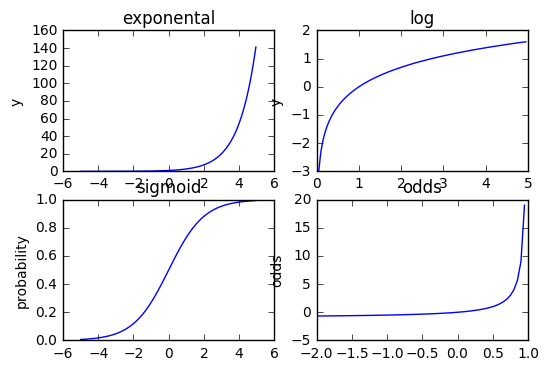

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure()

ax221=fig.add_subplot(221)
ax221.set_title('exponental')
exp=np.exp(x)
ax221.plot(x,exp,'-')
ax221.set_ylabel('y')

ax222=fig.add_subplot(222)
ax222.set_title('log')
log=np.log(x)
ax222.plot(x,log,'-')
ax222.set_ylabel('y')

ax223=fig.add_subplot(223)
ax223.set_title('sigmoid')
sigmoid=lambda(x):1.0/(1+np.exp(-x))
sig=sigmoid(x)
ax223.plot(x,sig,'-')
ax223.set_ylabel('probability')


ax224=fig.add_subplot(224)
ax224.set_title('odds')
x=np.arange(-2,1,0.05)  # when x=1, division by zero
odds=lambda(x):x/(1-x)
odd=odds(x)
ax224.plot(x,odd,'-')
ax224.set_ylabel('odds')

plt.show()

## S.4 로지스틱 회귀

### S.4.1 확률

로지스틱 회귀 Logistic regression은 회귀식을 우변에 두고, 좌변은 log-odds 값으로 만든다. 
그 회귀식의 결과 값을 이진 값을 가지도록 한다.
로지스틱 회귀 logistic regression은 odds의 로그 값으로, 선형회귀값을 0,1로 변환하게 된다.

$ ln(\frac{p}{1-p}) = w_0+w_1x $
     

Logistic regression 양변에 **anti-log**를 하면 (exponential을 곱하면)

$\frac{p}{1-p} = e^{w_0+w_1x}$

이를 p에 대해서 풀면 (e의 승수는 잠시 무시)
$
\begin{aligned}
 p &=\frac{e}{1+e}\\
   &=\frac{1}{\frac{1}{e}+1}\\
   &=\frac{1}{1+e^{-1}}
\end{aligned}
$

e의 승수를 넣으면 $ p =\frac{1}{1+e^{-(w_0+w_1x)}} $
즉 p는 x가 주어졌을 경우 가지는 값이고 0 ~ 1 사이의 값을 가진다.

### S.4.2 분류기준

Sigmoid를 이진분류하기 위해서는 그 기준이 있어야 한다. logistic함수(sigmoid)를 그려보면, **p=0.5에 변곡점**이 있다. 이 점을 기준으로 분류하게 된다.
* 확률 $p \ge 0.5$ -> Y=1
* 확률 $p \lt 0.5$ -> Y=0

e함수는 e(0)=1이고, 이 때 p=$\frac{1}{1+e^{-0}}=\frac{1}{1+2}=0.5$
* $ w_0 + w_1x > 0$ -> Y=1
* $ w_0 + w_1x < 0$ -> Y=0

## S.5 예제

### S.5.1 데이터 읽기

데이터 출처: 로지스틱스 회귀 위키피디어

0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50
0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1

모델링하고 나면 ```1.50464542837 -4.07771343109```

In [129]:
import numpy as np
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])
x=np.array([0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50])
y=np.array([0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1])
#y=np.array([0,0,0,0,0,0,100,0,100,0,100,0,100,0,100,100,100,100,100,100])
#x=np.array([23663, 20659, 32277, 21595, 27227, 25023, 26504, 28741, 21735,23366, 20871, 28370, 21105, 22706, 19527, 28321])
#y=np.array([    0,     0,     1,     0,     1,     0,     1,     1,     0,0,     0,     1,     0,     1,     1,     1])


### S.5.2 입력변수 x, 종속변수 y

데이터는 각 사례가 행이 되도록 구성한다.
첫째 행을 보자. x1=0.5, x0=1 이면 y=0 이런 식으로 데이터를 구성한다.
x0은 **y 절편**을 얻기 위해 일괄적으로 추가한다.
다음과 같은 식을 만족하는 w1,w0을 구하는 것이다.

$
0=w_1 \times 0.5 + w_0 \times 1\\
0=w_1 \times 0.75 + w_0 \times 1\\
\dots
$

```python
[ 0.5 , 1. ] -> 0
[ 0.75, 1. ] -> 0
[ 1.  , 1. ] -> 0
[ 1.25, 1. ] -> 0
[ 1.5 , 1. ] -> 0
...
```

절편 상수 열을 생성하기 위해 ```np.ones()```를 사용한다.
**인자는 shape**을 넣어 준다.
```[2,1]```인 경우 2행, 1열 데이터를 만든다.

그리고 x에 행으로 추가해서 원하는 형식으로 만들어 준다.

In [130]:
print x[:5], x.shape

[ 0.5   0.75  1.    1.25  1.5 ] (20,)


In [131]:
x=np.array([x,np.ones(x.shape[0])])

In [132]:
x=x.T

In [133]:
x.shape

(20, 2)

In [134]:
print x

[[ 0.5   1.  ]
 [ 0.75  1.  ]
 [ 1.    1.  ]
 [ 1.25  1.  ]
 [ 1.5   1.  ]
 [ 1.75  1.  ]
 [ 1.75  1.  ]
 [ 2.    1.  ]
 [ 2.25  1.  ]
 [ 2.5   1.  ]
 [ 2.75  1.  ]
 [ 3.    1.  ]
 [ 3.25  1.  ]
 [ 3.5   1.  ]
 [ 4.    1.  ]
 [ 4.25  1.  ]
 [ 4.5   1.  ]
 [ 4.75  1.  ]
 [ 5.    1.  ]
 [ 5.5   1.  ]]


### S.5.3 로지스틱 모델링

종속변수 y를 먼저 그리고 x는 절편 값이 기본으로 빠져 있으므로 필요하면 직접 추가해 주어야 한다.
```statsmodels.tools.add_constant()```를 사용하거나 위와 같이 추가할 수 있다.

입력변수는 컬럼데이터로 모두 맞춘다.

In [45]:
import statsmodels.formula.api as sm
logit = sm.Logit(y,x)
result = logit.fit()
w1,w0=result.params
print w1,w0

Optimization terminated successfully.
         Current function value: 0.401494
         Iterations 7
1.50464542837 -4.07771343109


$ ln(\frac{y}{1-y}) = w_0+w_1x $를 y에 대해서 풀면, 확률 $ y = \frac{1}{1+e^{-(w_0+w_1x)}} $이 된다.

이 식을 손으로 풀려면 쉽지 않다.
위 statsmodels의 logit 모델를 이용해서 풀면 다음 식이 성립한다.
$ y =\frac{1}{1+e^{-(-4.078 + 1.505x)}} $

위에서 구한 w1,w0을 대입해서 그래프로 그려보자.
녹색 점이 실제 데이터를 점으로 산포하였고,
**파란선**으로 그려진 **회귀식**은 실제데이터를 직선으로 관통하고 있다.
반면에 **빨간** **로지스틱함수**는 Sigmoid 곡선으로 회귀하고 있다.

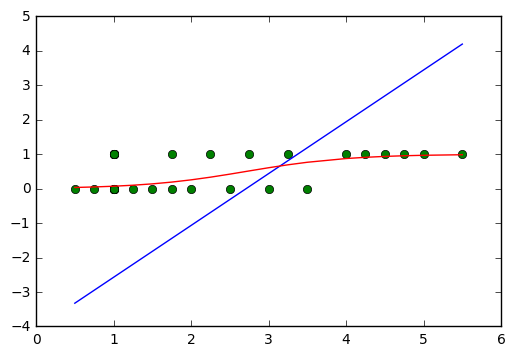

In [46]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'go')
plt.plot(x,w0+w1*x,'b-')
plt.plot(x,1/(1+np.exp(-(w0+w1*x))),'r-')
plt.show()

## 문제: 파일을 읽고 로지스틱 함수 그래프

In [2]:
import os
file=open(os.path.join("data","ds9_xy.txt"))

In [3]:
data=list()
for line in file:
    data.append(line.split())

In [4]:
import numpy as np
d=np.array(data)

In [5]:
x=d[:,0]
y=d[:,1]

In [8]:
x=x.astype('float')
y=y.astype('float')

In [10]:
print x,y

[ 0.24  0.25  0.28  0.3   0.33  0.35  0.36  0.36  0.36  0.36  0.4   0.4
  0.41  0.42  0.43  0.47  0.51  0.53  0.56  0.57  0.59  0.64  0.66  0.82
  0.85  0.94  1.04  1.04] [ 0.  0.  1.  1.  1.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  1.  1.
  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.]


In [12]:
x=np.array([x,np.ones(x.shape[0])])
x=x.T

In [13]:
import statsmodels.formula.api as sm
logit = sm.Logit(y,x)
result = logit.fit()
w1,w0=result.params
print w1,w0

Optimization terminated successfully.
         Current function value: 0.547344
         Iterations 7
5.0917352028 -1.63427753421


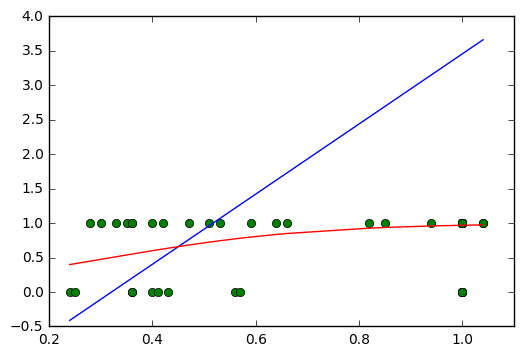

In [14]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'go')
plt.plot(x,w0+w1*x,'b-')
plt.plot(x,1/(1+np.exp(-(w0+w1*x))),'r-')
plt.show()

## S.6 Gradient

### S.6.1 Cost

cost는 아래와 같이 정의된다.

$
cost =\left\{
    \begin{array}{11}
      -log(h(x)) \space if \space y=1\\
      -log(1-h(x)) \space if \space y=0\\
     \end{array}
  \right.
$

위를 하나의 식으로 합하면:

$J(\theta) = \frac{1}{m} \sum_{i=1}^m (-y_i log(h(x_i)) - (1-y_i) log(1-h(x_i)))$


### S.6.2 입력변수 x, 종속변수 y

앞서 만들어준 x,y 데이터를 그대로 사용하기로 하자.

In [135]:
x1=x
y1=y

In [136]:
x1.shape, y1.shape

((20, 2), (20,))

In [137]:
print x1[:5]

[[ 0.5   1.  ]
 [ 0.75  1.  ]
 [ 1.    1.  ]
 [ 1.25  1.  ]
 [ 1.5   1.  ]]


In [138]:
print y1[:5]

[0 0 0 0 0]


### S.6.3 h(x) 함수

sigmoid 함수는 $\frac{p}{1-p} = e^{w_0+w_1x}$

p에 대해서 풀면:
$ p =\frac{1}{1+e^{-(w_0+w_1x)}} $

In [139]:
def sigmoid(x):
    import numpy as np
    return 1.0/(1+np.exp(-x))

위에서 푼 p가 h 함수이다. $ h=\frac{1}{1+e^{-(w_0+w_1x)}} $

x는 다음과 같이 열데이터로 만들어 준다.
```python
[ 0.5   1.  ]
[ 0.75  1.  ]
[ 1.    1.  ]
[ 1.25  1.  ]
[ 1.5   1.  ]
...
```

In [140]:
def h(x,theta):
    z=np.dot(x,theta)
    return sigmoid(z)

### S.6.4 weights

컬럼갯수만큼 만들어주고 x데이터와의 연산을 위해 shape을 맞추어 주어야 한다.
```python
weights=np.ones([x.shape[0],1])
```

In [141]:
weights=np.ones([x1.shape[1],1])
print weights,weights.shape

[[ 1.]
 [ 1.]] (2, 1)


앞서 만든 weights를 사용해 h(x)를 계산해보자. 앞 5개 x 데이터로 시험해보자.

In [142]:
h(x1[:5],weights)

array([[ 0.81757448],
       [ 0.8519528 ],
       [ 0.88079708],
       [ 0.90465054],
       [ 0.92414182]])

### S.6.5 gradient 계산

#### cost function

cost function은 h-y로 계산한다.
아래 식에서 보듯이 **전체 평균**을 계산하므로, **결과 값은 1개** 이다.
```python
total_cost = -(1/m)*np.sum(y*np.log(h)+(1-y)*np.log(1-h))
```

In [143]:
y1=y1[:,np.newaxis]

In [144]:
y1.shape

(20, 1)

In [145]:
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [146]:
loss(h(x1,weights),y1)

1.4373882978982158

기울기 Gradient는 오류에 x.T를 계산해야 한다.
x의 transpose를 계산해야 하는 이유는,
gradient는 **x 컬럼 갯수만큼 결과가 산출**되어야 한다.

* x는 transpose해서 (2,20)으로 구성하고:
```python
[ 0.5 ,  0.75,  1.  ,  1.25,  1.5 ...],
[ 1.  ,  1.  ,  1.  ,  1.  ,  1...]])
```
* ```h-y``` error는 (20,1)

따라서 ```dot()```연산을 하면, (2,20) x (20,1) -> (2,1) 새로운 weights는 컬럼 갯수만큼 되어야 한다.

$
\nabla f=\frac{\partial{J(\theta)}}{\partial{\theta_j}}=\frac{1}{m}\sum_{i=1}^m(h(x_i)-y_i)x_i
$


In [117]:
h(x1,weights).shape, x1.shape,y1.shape

((20, 1), (20, 2), (20, 1))

In [118]:
error=h(x1,weights)-y1
print error.shape

(20, 1)


In [119]:
np.dot(x1.T,error)

array([[ 16.42888382],
       [  9.05573467]])

이를 함수로 만들면, x의 transpose로 계산해야 한다.

In [120]:
def gradientDescent(x, h, y):
    return np.dot(x.T, (h - y)) / y.shape[0]

In [121]:
gradientDescent(x1,h(x1,weights),y1)

array([[ 0.82144419],
       [ 0.45278673]])

### S.6.6 update

우리가 찾고자 하는 weights에서 gradient를 하강하면서, 즉 $weights-\alpha \times gradient$가 수렴할 때까지 반복한다.

In [127]:
iter=10000
alpha=0.01
#m=X.shape[0]
#####weights=np.ones([x1.shape[1]])
weights=np.ones([x1.shape[1],1])
#theta=np.array([1,1],dtype=float)
for i in range(iter):
    #predicted
    _h=h(x1,weights)
    #error
    error=_h-y1
    #gradient=np.dot(x1.T, error) / y1.shape[0]
    gradient=np.dot(x1.T, error)
    #update
    weights-=alpha*gradient
    if i%1000==0:
        print "{0} theta:{1}".format(i,weights)
print weights

0 theta:[[ 0.83571116]
 [ 0.90944265]]
1000 theta:[[ 1.46445514]
 [-3.95885309]]
2000 theta:[[ 1.50248787]
 [-4.07133946]]
3000 theta:[[ 1.50452706]
 [-4.07736375]]
4000 theta:[[ 1.50463893]
 [-4.07769422]]
5000 theta:[[ 1.50464507]
 [-4.07771238]]
6000 theta:[[ 1.50464541]
 [-4.07771337]]
7000 theta:[[ 1.50464543]
 [-4.07771343]]
8000 theta:[[ 1.50464543]
 [-4.07771343]]
9000 theta:[[ 1.50464543]
 [-4.07771343]]
[[ 1.50464543]
 [-4.07771343]]


## 문제 입력변수 2개인 로지스틱 회귀

### 데이터 읽기

#### pandas

pandas에서 파일을 TAB 구분자로 분리하고, 헤더는 없도록 읽는다.

```python
pd.read_csv("https://github.com/shenweichen/Machine-Learning-in-Action/blob/master/Ch05/testSet.txt")
```

```python
dt=np.dtype( {'names': ['x1','x2','y'], 'formats':['f','f','i'] } )
x=np.loadtxt('testSet.txt',delimiter='\t',dtype=dt) #shape(100,)
```

In [321]:
mydir=os.getenv('HOME')+'/Code/git/else/machinelearninginaction/Ch05'
filename=os.path.join(mydir,'testSet.txt')

In [665]:
import pandas as pd
df=pd.read_csv(filename,sep='\t', header=None)

In [666]:
print df.head()
print df.shape

          0          1  2
0 -0.017612  14.053064  0
1 -1.395634   4.662541  1
2 -0.752157   6.538620  0
3 -1.322371   7.152853  0
4  0.423363  11.054677  0
(100, 3)


#### x, y 읽기

데이터프레임에서 인덱스로 데이터를 읽는 경우 ```iloc``` 명령어를 사용한다.

In [667]:
x = df.iloc[:,0:2]
y = df.iloc[:,2]

In [668]:
x.shape, y.shape

((100, 2), (100,))

### y dim 맞추어 주기

In [443]:
y=y[:,np.newaxis].astype(float)
y.shape

(100, 1)

#### x에 상수 컬럼 추가하기

입력변수 x는 컬럼별로 만들어 준다.
절편을 구하기 위해 곱해도 차이가 나지 않는 '1' 컬럼을 추가한다.

**인자는 shape**을 넣어 준다.
```[2,1]```인 경우 2행, 1열 데이터를 만든다.

x데이터와 상수컬럼 간에 차원이 서로 맞추어 주기 위해
```x[:, np.newaxis]```로 1d를 2d로 전환해준다.

```python
[ -0.017612  14.053064   1.      ]
[ -1.395634   4.662541   1.      ]
[ -0.752157   6.53862    1.      ]
[ -1.322371   7.152853   1.      ]
[  0.423363  11.054677   1.      ]
 ```

In [669]:
b=np.ones([x.shape[0]])
b=b[:, np.newaxis]
b.shape

(100, 1)

In [670]:
x=np.hstack([x,b])

In [672]:
print x[:5], x.shape

[[ -0.017612  14.053064   1.      ]
 [ -1.395634   4.662541   1.      ]
 [ -0.752157   6.53862    1.      ]
 [ -1.322371   7.152853   1.      ]
 [  0.423363  11.054677   1.      ]] (100, 3)


#### weights 초기화

각 입력변수에 대한 weights를 gradient descent 방법으로 구하게 된다.
이 떄 필요한 weights를 입력데이터 컬럼 수만큼 초기화해 놓는다.

In [674]:
import numpy as np
weights=np.ones([x.shape[1]])
#weights=np.ones([x.shape[1],1])
print weights

[ 1.  1.  1.]


#### h(x) 계산하기

입력변수 컬럼별로 할당된 weights를 x에 곱해주면 된다.
곱셈은 ```dot()```으로 한다.
h의 갯수는 당연히 사례 수만큼이 되어야 한다.

$h(x) = w^T x+b$

In [675]:
np.dot(x,weights).shape

(100,)

In [448]:
np.dot(x,weights).shape

(100, 1)

h를 나중에 gradient 계산을 위해 저장해 두자.

In [676]:
h=sigmoid(np.dot(x,weights)) #(100,1)
print h.shape

(100,)


### gradient 계산

오류가 제대로 계산되었는지 일부만 확인해보자

In [677]:
y.shape, h.shape

((100,), (100,))

In [678]:
error=(y - h)
for i in range(5):
    print "{0}={1}-{2}".format(error[i],h[i],y[i])

-0.999999704753=0.999999704753-0
0.0138311130718=0.986168886928-1
-0.998872318268=0.998872318268-0
-0.9989208286=0.9989208286-0
-0.999996190619=0.999996190619-0


gradient는 weights별로 계산되어야 하므로, 컬럼 갯수만큼 구해야 한다.

In [679]:
gradient=np.dot(x.T,error)
print gradient

[ -17.14703987 -511.71675367  -36.41425331]


### weight 계산

In [680]:
alpha=0.001
weights = weights + alpha * gradient  #(3,100)
print weights

[ 0.98285296  0.48828325  0.96358575]


In [461]:
alpha=0.001
weights = weights + alpha * gradient  #(3,100)
print weights

[[ 0.96570592]
 [-0.02343351]
 [ 0.92717149]]


### 함수로 만들기

In [693]:
#data=np.array([1.0,2.2,3.3])
alpha=0.001 #learning rate
maxCycles=200000
weights=np.ones([x.shape[1]])
for k in range(maxCycles):
    h=sigmoid(np.dot(x,weights)) #(100,1)
    error=(y - h)
    gradient=np.dot(x.T, error)
    weights = weights + alpha * gradient
    if(k%10000==0):
        print "{0}--> {1},{2}".format(k,weights,np.sum(error))
print "---weights",weights
#weights=logRegres.gradAscent(dataList,labelList)
#matrix([[ 4.12414349],
#        [ 0.48007329],
#        [-0.6168482 ]])

0--> [ 0.98285296  0.48828325  0.96358575],-36.4142533131
10000--> [  1.00906823  -1.53615333  11.23590731],0.267328344801
20000--> [  1.13022956  -1.7637027   12.95688479],0.110264699661
30000--> [  1.18525449  -1.86928807  13.75157234],0.0562420790788
40000--> [  1.21423036  -1.92553017  14.17391789],0.0310738146611
50000--> [  1.23046916  -1.9572544   14.41185843],0.0178407768514
60000--> [  1.2398605   -1.97567049  14.54988899],0.0104552322235
70000--> [  1.24538603  -1.98652991  14.63124878],0.00619809976179
80000--> [  1.2486691   -1.99299071  14.67964232],0.00369896595708
90000--> [  1.250631    -1.9968546   14.70857995],0.00221618879254
100000--> [  1.25180736  -1.99917249  14.72593782],0.0013309016793
110000--> [  1.25251413  -2.00056551  14.73636912],0.000800369216126
120000--> [  1.25293928  -2.00140361  14.74264485],0.000481723275491
130000--> [  1.25319522  -2.00190818  14.74642301],0.000290083403706
140000--> [  1.25334935  -2.00221207  14.74869848],0.000174734743024
1500

### Classify

b의 역할???

In [45]:
# textbook p.98
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5: return 1.0
    else: return 0.0
inX=np.array([1,10,1])
print inX
print weights.shape
yhat=classifyVector(inX,weights)
print "classified results: {0}".format(yhat)


[ 1 10  1]
(3,)
classified results: 1.0


In [694]:
import statsmodels.formula.api as sm
logit = sm.Logit(y,x)
result = logit.fit()
w2,w1,w0=result.params
print w2,w1,w0

Optimization terminated successfully.
         Current function value: 0.093158
         Iterations 10
1.25358295769 -2.00267268881 14.7521474379


* 오류 계산


## stochastic gradient ascent

* 교재 p.94
* $\alpha$ changes

In [44]:
import random
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m,n = np.shape(dataMatrix)
    weights = np.ones(n)
    for j in range(numIter):
        dataIndex = range(m)
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.01
            randIndex = int(random.uniform(0,len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights
weights=stocGradAscent1(np.array(dataList),labelList)
print weights


[ 13.59355019   1.1995636   -2.10438444]


## 문제: horse-colic

url에서 읽어옴.

데이터는 훈련용, 테스트용으로 구분되어 있다.
* ```horse-colic.data```는 300개 훈련 데이터
* ```horse-colic.test```는 68개 테스트 데이터

데이터 속성은 아래와 같이 28개, 헤더는 제공되지 않고 있다.
```python
  1:  surgery
  2:  Age 
  3:  Hospital Number 
  4:  rectal temperature
  5:  pulse 
  6:  respiratory rate
  7:  temperature of extremities
  8:  peripheral pulse
  9:  mucous membranes
 10: capillary refill time
 11: pain - a subjective judgement of the horse's pain level
 12: peristalsis                              
 13: abdominal distension
 14: nasogastric tube
 15: nasogastric reflux
 16: nasogastric reflux PH
 17: rectal examination - feces
 18: abdomen
 19: packed cell volume
 20: total protein
 21: abdominocentesis appearance
 22: abdomcentesis total protein
 23: outcome
 24: surgical lesion?
 25, 26, 27: type of lesion
 28: cp_data
```

In [245]:
## to del 20190812

# 1.1 pandas reading from url
import pandas as pd
import urllib2
import os
url0='http://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.data'
url1='http://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.test'
frtrain=pd.read_csv(url0,header=None) #(300,1)
frtest=pd.read_csv(url1,header=None) #(68,1)
print frtrain[0][0] #row1
print frtest[0][0]

#1.2 numpy reading from textbook data
frtrain=os.path.join(dir,'horseColicTraining.txt')
frtest=os.path.join(dir,'horseColicTest.txt')
print "File exists? {0} {1}".format(os.path.isfile(frtrain),os.path.isfile(frtest))

x0=np.loadtxt(frtrain,delimiter='\t',skiprows=0) #(299,22)
x1=np.loadtxt(frtest,delimiter='\t',skiprows=0) #(299,22)
trainDataLabels=x0[:,-1] #(299,) 22번째 열이 class labels
trainDataArr=x0[:,range(0,21)] #(299,21)
testDataLabels=x1[:,-1] #(67,) 22번째 열이 class labels
testDataArr=x1[:,range(0,21)] #(67,21)

# 2. train
weights=stocGradAscent1(trainDataArr, trainDataLabels, 500)
print weights

# 3. classify
for i in range(10):
    inX=testDataArr[i]
    yhat=classifyVector(inX,weights)
    print "answer={0} yhat={1} testDataArr={2}".format(yhat, testDataLabels[i],testDataArr[i])


2 1 530101 38.50 66 28 3 3 ? 2 5 4 4 ? ? ? 3 5 45.00 8.40 ? ? 2 2 11300 00000 00000 2
2 1 528626 38.50 54 20 ? 1 2 2 3 4 1 2 2 5.90 ? 2 42.00 6.30 ? ? 1 2 03111 00000 00000 1


AttributeError: 'builtin_function_or_method' object has no attribute 'endswith'

## simple (without vectors)

source: cs229 regression at Standford

houses with the (living area (in feet2), and number of bedrooms) with the resulting price :

* Living area (feet2) : 2104
* n of bedrooms : 3
* Price (1000$s) : 400

$h_{theta}(x) = theta_0 + theta_1 x_1 + theta_2 x_2$

* $x_1$: living area
* $x_2$: n of bedrooms
* $h_{theta}(x)$: the estimated price.

* the cost function ($hserror$) (for one point) : $hserror = \frac{1}{2} (h_{theta}(x) - y)^2$


In [47]:
# source http://tiku.io/questions/354630/gradient-descent-using-python-and-numpy
# vector way - y=0.9951x+30.008
#10,000반복  theta=22,1.1
#100,000반복 theta=30,1에 가까워져 정확해짐
import numpy as np
import random

# m denotes the number of examples here, not the number of features
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        if i%500 == 0:
            print("Iteration %d | Cost: %f" % (i, cost))
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    return theta

def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 10)
m, n = np.shape(x)
numIterations= 10000 #100000
alpha = 0.0005
theta = np.ones(n)
theta = gradientDescent(x, y, theta, alpha, m, numIterations)
print(theta) # 약 30,1


Iteration 0 | Cost: 431.105040
Iteration 500 | Cost: 100.666911
Iteration 1000 | Cost: 89.068984
Iteration 1500 | Cost: 78.852907
Iteration 2000 | Cost: 69.854037
Iteration 2500 | Cost: 61.927348
Iteration 3000 | Cost: 54.945094
Iteration 3500 | Cost: 48.794749
Iteration 4000 | Cost: 43.377194
Iteration 4500 | Cost: 38.605121
Iteration 5000 | Cost: 34.401622
Iteration 5500 | Cost: 30.698954
Iteration 6000 | Cost: 27.437445
Iteration 6500 | Cost: 24.564533
Iteration 7000 | Cost: 22.033917
Iteration 7500 | Cost: 19.804815
Iteration 8000 | Cost: 17.841301
Iteration 8500 | Cost: 16.111733
Iteration 9000 | Cost: 14.588236
Iteration 9500 | Cost: 13.246258
[ 22.21918599   1.11969241]


In [222]:
import pandas as pd

url0='http://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.data'
url1='http://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.test'
frtrain=pd.read_csv(url0,header=None) #(300,1)
frtest=pd.read_csv(url1,header=None) #(68,1)
print frtrain[0][0] #row1
print frtest[0][0]

2 1 530101 38.50 66 28 3 3 ? 2 5 4 4 ? ? ? 3 5 45.00 8.40 ? ? 2 2 11300 00000 00000 2
2 1 528626 38.50 54 20 ? 1 2 2 3 4 1 2 2 5.90 ? 2 42.00 6.30 ? ? 1 2 03111 00000 00000 1


## 문제: 입학

UCLA대학에서 제공되는 데이터를 분석해보자.
```admit```은 종속변수로, 합격/불합격을 나타내는 이진적 값을 가진다.
나머지 변수는 독립변수로 GRE (Graduate Record Exam scores), GPA (grade point average), rank는 학부의 평판을 나타낸댜.
GRE, GPA는 연속변수이고 rank는 학부평판으로 1이면 최상 4이면 최하의 평판을 의미한다.

Python patsy, statsmodel, sklearn, numpy, Spark로 풀어보자.

### 데이터 읽기

데이터를 읽어서 ```head()``` 함수로 일부만 출력해보자.

In [4]:
import pandas as pd
df = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


열에 'rank'를 볼 수 있는데, 동일한 명칭의 함수가 ```DataFrame```에 있기 때문에 'prestige'로 변경하자.

In [5]:
df.columns = ["admit", "gre", "gpa", "prestige"]

변수의 평균, 표준편차, 최소, 최대 값을 계산해보자.
이런 통계값을 통해 변수에 오류가 있는지 검증한다.

In [6]:
print df.describe()

            admit         gre         gpa   prestige
count  400.000000  400.000000  400.000000  400.00000
mean     0.317500  587.700000    3.389900    2.48500
std      0.466087  115.516536    0.380567    0.94446
min      0.000000  220.000000    2.260000    1.00000
25%      0.000000  520.000000    3.130000    2.00000
50%      0.000000  580.000000    3.395000    2.00000
75%      1.000000  660.000000    3.670000    3.00000
max      1.000000  800.000000    4.000000    4.00000


```admit```과 ```prestige```의 교차빈도를 계산해보자

In [7]:
print pd.crosstab(df['admit'], df['prestige'], rownames=['admit'])

prestige   1   2   3   4
admit                   
0         28  97  93  55
1         33  54  28  12


히스토그램을 그려서 변수의 특징을 살펴보자.

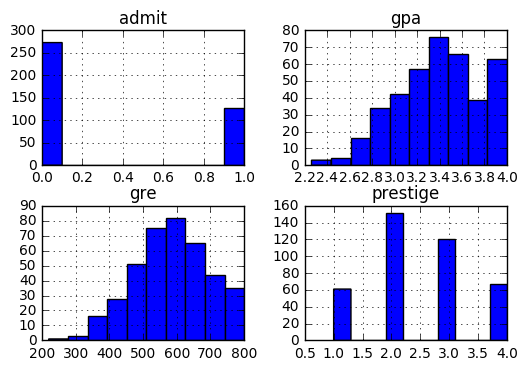

In [8]:
%matplotlib inline
import pylab as pl
df.hist()
pl.show()

### 모델링

pasty를 이용해 모델링을 완성해보자.


```DesignMatrics``` 첫째 인자는 
```python
admit ~ gre + gpa + C(prestige)
```
두번째 인자는 데이터 df, return_type을 정해 줄 수 있다. pandas DataFrame 또는 numpy record array로 저장할 수 있다.
prestige는 **category 변수**로 만들어 모델을 만들어 준다.

반환 값은 종속변수와 독립변수인 y, X를 돌려준다.

In [13]:
X.head()

,Intercept,C(prestige)[T.2],C(prestige)[T.3],C(prestige)[T.4],gre,gpa
0,1,0,1,0,380,3.61
1,1,0,1,0,660,3.67
2,1,0,0,0,800,4.00
3,1,0,0,1,640,3.19
4,1,0,0,1,520,2.93


### statsmodel

아래 표에서 절편과 prestige, gre, gpa에 대한 가중치가 출력되고 있다. 모두 유의적인 확률을 보이고 있다.

In [22]:
import statsmodels.discrete.discrete_model as sm

logit = sm.Logit(y,X)
result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Sun, 24 Nov 2019   Pseudo R-squ.:                 0.08292
Time:                        18:16:51   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 7.578e-08
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept           -3.9900      1.140     -3.500      0.000        -6.224    -1.756
C(prestige)

weights와 conf_int 신뢰구간을 출력해보자.

In [23]:
print result.params

Intercept          -3.989979
C(prestige)[T.2]   -0.675443
C(prestige)[T.3]   -1.340204
C(prestige)[T.4]   -1.551464
gre                 0.002264
gpa                 0.804038
dtype: float64


In [26]:
print result.conf_int()

                         0         1
Intercept        -6.224242 -1.755716
C(prestige)[T.2] -1.295751 -0.055135
C(prestige)[T.3] -2.016992 -0.663416
C(prestige)[T.4] -2.370399 -0.732529
gre               0.000120  0.004409
gpa               0.153684  1.454391


### sklearn

sklearn 모듈로 해보자.
순서대로 절편과 prestige, gre, gpa에 대한 가중치가 출력되고 있으며 statsmodel의 결과와 비교해 보자.
statsmodel과 그 결과에 약간의 차이가 있다.

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(fit_intercept = False, C = 1e9)
mdl = model.fit(X, y)
model.coef_

/usr/lib/python2.7/dist-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ -3.97765654e+00,  -6.74567838e-01,  -1.33708167e+00,
         -1.55029740e+00,   2.25513643e-03,   8.01765501e-01]])

## 문제: statsmodels datasets를 이용한 간단한 OLS 예제

* ordinary least square

In [27]:
import statsmodels.api as sm
data = sm.datasets.longley.load_pandas()
# x exog exogenous, y endog endogenous
data.exog.head()

data.endog.head()


print data.exog_name
print data.endog_name
print type(data)
print type(data.data)

y, x=data.endog, data.exog
res=sm.OLS(y,x).fit()
res.summary()

['GNPDEFL', 'GNP', 'UNEMP', 'ARMED', 'POP', 'YEAR']
TOTEMP
<class 'statsmodels.datasets.utils.Dataset'>
<class 'pandas.core.frame.DataFrame'>


/usr/lib/python2.7/dist-packages/scipy/stats/stats.py:1557: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TOTEMP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.052e+04
Date:                Sun, 24 Nov 2019   Prob (F-statistic):           8.20e-22
Time:                        18:19:39   Log-Likelihood:                -117.56
No. Observations:                  16   AIC:                             247.1
Df Residuals:                      10   BIC:                             251.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
GNPDEFL      -52.9936    129.545     -0.409      0.691      -341.638   235.650
GNP            0.0711      0.030      2.356      0.040         0.004     0.138
UNEMP         -0.4235      0.418     -1.014      0.335        -1.354     0.507
ARMED         -0.5726      0.279     -2.052      0.067        -1.194     0.049
POP           -0.4142      0.321     -1.289      0.226        -1.130     0.302
YEAR          48.4179     17.689      2.737      0.021         9.003    87.832
==============================================================================
Omnibus:                        1.443   Durbin-Watson:                   1.277
Prob(Omnibus):                  0.486   Jarque-Bera (JB):                0.605
Skew:                           0.476   Prob(JB):                        0.739
Kurtosis:                       3.031   Cond. No.                     4.56e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 문제: Spark

* LogisticRegression은 분류에 사용하고, 2진 (ml) 또는 다분류 (mllib)

In [40]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ml-bank').getOrCreate()

Spark는 url로부터 읽어오는 것은 불가능하므로, pandas read_csv를 이용해서 읽어보자.

In [51]:
import pandas as pd
df =spark.createDataFrame(pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv"))
df.printSchema()
df.take(5)

root
 |-- admit: long (nullable = true)
 |-- gre: long (nullable = true)
 |-- gpa: double (nullable = true)
 |-- rank: long (nullable = true)



[Row(admit=0, gre=380, gpa=3.61, rank=3),
 Row(admit=1, gre=660, gpa=3.67, rank=3),
 Row(admit=1, gre=800, gpa=4.0, rank=1),
 Row(admit=1, gre=640, gpa=3.19, rank=4),
 Row(admit=0, gre=520, gpa=2.93, rank=4)]

In [54]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
#from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

clsIndexer = StringIndexer(inputCol="admit", outputCol="label")
#i1Indexer = StringIndexer(inputCol="age", outputCol="i1")
#i2Indexer = StringIndexer(inputCol="f1", outputCol="i2")
#i3Indexer = StringIndexer(inputCol="f2", outputCol="i3")
i4Indexer = StringIndexer(inputCol="rank", outputCol="i4")
va = VectorAssembler(inputCols=["gpa","gre","i4"],outputCol="features")
#df3 = va.transform(df2)

pipeline = Pipeline(stages=[clsIndexer,i4Indexer,va])
# Fit the pipeline to training documents.
model = pipeline.fit(df)
df2 = model.transform(df)

In [58]:
df2.show()

+-----+---+----+----+-----+---+----------------+
|admit|gre| gpa|rank|label| i4|        features|
+-----+---+----+----+-----+---+----------------+
|    0|380|3.61|   3|  0.0|1.0|[3.61,380.0,1.0]|
|    1|660|3.67|   3|  1.0|1.0|[3.67,660.0,1.0]|
|    1|800| 4.0|   1|  1.0|3.0| [4.0,800.0,3.0]|
|    1|640|3.19|   4|  1.0|2.0|[3.19,640.0,2.0]|
|    0|520|2.93|   4|  0.0|2.0|[2.93,520.0,2.0]|
|    1|760| 3.0|   2|  1.0|0.0| [3.0,760.0,0.0]|
|    1|560|2.98|   1|  1.0|3.0|[2.98,560.0,3.0]|
|    0|400|3.08|   2|  0.0|0.0|[3.08,400.0,0.0]|
|    1|540|3.39|   3|  1.0|1.0|[3.39,540.0,1.0]|
|    0|700|3.92|   2|  0.0|0.0|[3.92,700.0,0.0]|
|    0|800| 4.0|   4|  0.0|2.0| [4.0,800.0,2.0]|
|    0|440|3.22|   1|  0.0|3.0|[3.22,440.0,3.0]|
|    1|760| 4.0|   1|  1.0|3.0| [4.0,760.0,3.0]|
|    0|700|3.08|   2|  0.0|0.0|[3.08,700.0,0.0]|
|    1|700| 4.0|   1|  1.0|3.0| [4.0,700.0,3.0]|
|    0|480|3.44|   3|  0.0|1.0|[3.44,480.0,1.0]|
|    0|780|3.87|   4|  0.0|2.0|[3.87,780.0,2.0]|
|    0|360|2.56|   3

In [56]:
from pyspark.ml.classification import LogisticRegression
#LogisticRegression(maxIter=10, regParam=0.01)
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(df2)

In [57]:
print "* summary: ", lrModel.summary
print lrModel.coefficients
print lrModel.intercept

[0.738759064925,0.0026720018611,0.110415097642]
-5.00658129367


20190826
#### pyspark.mllib.classification.LogisticRegression

* mllib는 최적화 방식에 따라 모델을 지원한다.
    * Stochastic gradient descent (SGD)
    * LBFGS Limited-memory BFGS
* mllib는 다항분류가 가능하다.
* 주의: map()은 lazy evaluation이고, 사용되는 시점에시 실제 변환이 발생한다. 따라서 Vectors 클래스가 필요하다.

In [ ]:
from pyspark.mllib.classification import LogisticRegressionWithSGD
lrm = LogisticRegressionWithSGD.train(trainRdd, iterations=10)

* 아래는 Decsion Tree의 Young False 이런 데이터의 밑에 붙어 있던거 20190826MON1700

In [ ]:
from pyspark.mllib.linalg import Vectors
from pyspark.mllib.classification import LogisticRegressionWithLBFGS
lrm = LogisticRegressionWithLBFGS.train(trainRdd, iterations=10)

In [ ]:
* 예측
    * 모델의 predict() 함수를 사용한다.

lrm.predict([1.0,0.0,1.1,1.2])

labelsAndPreds=trainRdd.map(lambda p: (p.label, lrm.predict(p.features)))

labelsAndPreds.collect()

* 오류
    * 예측결과가 맞지 않는 비율을 계산

trainErr = labelsAndPreds\
    .filter(lambda(v,p): v != p).count() / float(trainRdd.count())
print("Training Error = " + str(trainErr))

* 모델을 저장할 수 있다.
    * 디렉토리를 지정하면 메타데이터를 저장한다.

model.save(sc, "myModelPath")
sameModel = LogisticRegressionModel.load(sc, "myModelPath")

## 문제 성별

### 데이터 읽기

237명의 University of Adelaide 통계과목 수강생의 설문 응답
* Sex: 성별 ("Male" "Female")
* Wr.Hnd span: 글쓰는 손의 거리 (펼쳤을 때 엄지끝에서 약지 끝까지의 거리, 센티미티)
* NW.Hnd span: 글쓰지 않는 손의 거리
* W.Hnd: 글쓰는 손 ("Left" "Right".)
* Fold: 팔짱을 끼었을 경우 위에 있는 팔 ("R on L", "L on R", "Neither")
* Pulse: 맥박 (beats per minute).
* Clap: 손뼉을 칠 때 위에 있는 손 ("Right", "Left", "Neither".)
* Exer: 운동 빈도 ("Freq" (frequently), "Some", "None".)
* Smoke: 흡연 정도 ("Heavy", "Regul" (regularly), "Occas" (occasionally),"Never".)
* Height: 키 (센티미터)
* M.I: 키를 응답한 방법 (영국식 feet/inches 또는 미터법 Metric: centimetres/metres)
* Age: 나이 (년)

In [13]:
#taken from pystat from this below
import statsmodels.api as sm
mass=sm.datasets.get_rdataset("survey","MASS")

In [14]:
mass.data.head()

,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
0,Female,18.5,18.0,Right,R on L,92,Left,Some,Never,173.0,Metric,18.250
1,Male,19.5,20.5,Left,R on L,104,Left,None,Regul,177.8,Imperial,17.583
2,Male,18.0,13.3,Right,L on R,87,Neither,None,Occas,NaN,NaN,16.917
3,Male,18.8,18.9,Right,R on L,NaN,Neither,None,Never,160.0,Metric,20.333
4,Male,20.0,20.0,Right,Neither,35,Right,Some,Never,165.0,Metric,23.667


In [15]:
type(mass.data)

pandas.core.frame.DataFrame

### 컬럼명

In [16]:
mass.data.columns

Index([u'Sex', u'Wr.Hnd', u'NW.Hnd', u'W.Hnd', u'Fold', u'Pulse', u'Clap',
       u'Exer', u'Smoke', u'Height', u'M.I', u'Age'],
      dtype='object')

In [17]:
mass.data.columns=['sex','wr','nw','w','fold','pulse','clap','exer','smoke','height','mi','age']

In [18]:
mass.data.columns

Index([u'sex', u'wr', u'nw', u'w', u'fold', u'pulse', u'clap', u'exer',
       u'smoke', u'height', u'mi', u'age'],
      dtype='object')

### 종속변수

종속변수 'Sex'에 대해 살펴보자

In [19]:
mass.data.groupby('sex').mean()

,wr,nw,pulse,height,age
sex,,,,,
Female,17.595763,17.45678,75.126316,165.686667,20.407534
Male,19.741880,19.71453,73.197917,178.826038,20.331958


In [20]:
mass.data.groupby('sex').count()

,wr,nw,w,fold,pulse,clap,exer,smoke,height,mi,age
sex,,,,,,,,,,,
Female,118,118,117,118,95,118,118,118,102,102,118
Male,117,117,118,118,96,117,118,117,106,106,118


/usr/local/lib/python2.7/dist-packages/seaborn/linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/seaborn/linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


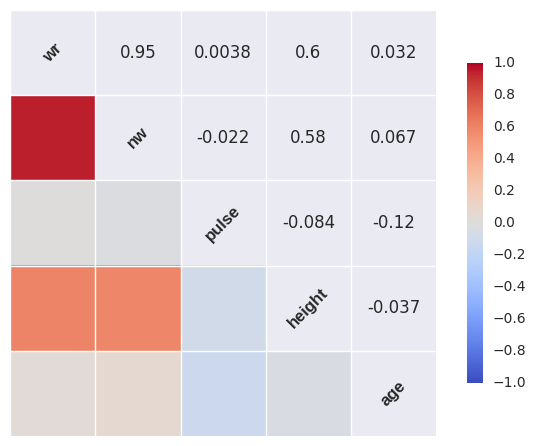

In [21]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
sns.corrplot(mass.data)
plt.show()

### 로지스틱 모델

In [22]:
formula='sex ~ wr+nw+w+pulse+height+age'
import statsmodels.formula.api as smf
model=smf.glm(formula,data=mass.data,family=sm.families.Binomial()).fit()

In [23]:
print (model.summary())

                      Generalized Linear Model Regression Results                       
Dep. Variable:     ['sex[Female]', 'sex[Male]']   No. Observations:                  168
Model:                                      GLM   Df Residuals:                      161
Model Family:                          Binomial   Df Model:                            6
Link Function:                            logit   Scale:                             1.0
Method:                                    IRLS   Log-Likelihood:                -52.236
Date:                          Mon, 18 Nov 2019   Deviance:                       104.47
Time:                                  16:43:37   Pearson chi2:                     646.
No. Iterations:                               8                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     49.5650      8.052      6.1

In [24]:
formula2='sex ~ nw+height'
model2=smf.glm(formula2,data=mass.data,family=sm.families.Binomial()).fit()
print (model2.summary())

                      Generalized Linear Model Regression Results                       
Dep. Variable:     ['sex[Female]', 'sex[Male]']   No. Observations:                  207
Model:                                      GLM   Df Residuals:                      204
Model Family:                          Binomial   Df Model:                            2
Link Function:                            logit   Scale:                             1.0
Method:                                    IRLS   Log-Likelihood:                -67.329
Date:                          Mon, 18 Nov 2019   Deviance:                       134.66
Time:                                  16:44:10   Pearson chi2:                     468.
No. Iterations:                               8                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     49.1014      6.919      7.0

In [25]:
formula3='height ~ 1+sex'
model3=smf.ols(formula3,data=mass.data).fit()
print model3.summary()

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     165.1
Date:                Mon, 18 Nov 2019   Prob (F-statistic):           3.86e-28
Time:                        16:44:31   Log-Likelihood:                -709.66
No. Observations:                 208   AIC:                             1423.
Df Residuals:                     206   BIC:                             1430.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     165.6867      0.730    226.978      

$$ y=\beta_0 + \beta_1 \times x $$

$$ \hat{y} = \hat{\beta_0} + \hat{\beta_1} \times x $$

* regression 결과에서 Intercept(165.686) + Male(13.139)는 평균과 동일
* regression과 anova는 같은 결과를 보여줌.

In [26]:
anova_model=smf.ols(formula3,data=mass.data).fit()

In [27]:
print anova_model.summary()

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     165.1
Date:                Mon, 18 Nov 2019   Prob (F-statistic):           3.86e-28
Time:                        16:45:00   Log-Likelihood:                -709.66
No. Observations:                 208   AIC:                             1423.
Df Residuals:                     206   BIC:                             1430.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     165.6867      0.730    226.978      

In [30]:
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot

In [ ]:
fig = interaction_plot(data.dose, data.supp, data.len,
             colors=['red','blue'], markers=['D','^'], ms=10)

In [32]:
anova_lm(anova_model)

AttributeError: 'DataFrame' object has no attribute 'design_info'

In [ ]:
anova_lm

### ROC

In [37]:

trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

NameError: name 'lrModel' is not defined

In [36]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

NameError: name 'trainingSummary' is not defined

## 문제 M-1: Titanic case

### 문제
1912년 4월 15일 Titanic 유람선 사고의 탑승객 2224명의 승객 및 선원 가운데 1502명이 사망했다. 사고 당시의 탑승객 위치, 상황 등 관련 데이터를 분석하여 생존 여부를 예측하자. 출처: Kaggle

### 해결

사고 당시의 탑승객 위치 및 상황에 따라 생존하였는지를 구별하는 **이진 분류** 문제이다. 

In [28]:
import os
import sys 
os.environ["SPARK_HOME"]=os.path.join(os.environ['HOME'],'Downloads','spark-2.0.0-bin-hadoop2.7')
os.environ["PYLIB"]=os.path.join(os.environ["SPARK_HOME"],'python','lib')
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.1-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'pyspark.zip'))

In [29]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

### 데이터

#### 파일 내려받기
https://www.kaggle.com/c/titanic 페이지로 가서 데이터를 내려받는다.
압축을 풀어서 경로 ```./data/kaggle/titanic```에 저장해 놓는다.

파일 | 설명
-----|-----
train.csv | 훈련 파일, 'Survived' 열의 값을 label로 사용한다.
test.csv | 테스트 파일, 'Survived' 열의 값을 예측해야 한다.
gender_submission.csv | 예측 결과 제출 파일 예제

In [2]:
!ls data/kaggle/titanic/

gender_submission.csv  test.csv  train.csv


#### train, test 파일 읽기

파일 ```train.csv```는 ```csv```형식으로 만들어져 있다.
csv를 읽으려면, 앞서 설명한 바와 같이 https://spark-packages.org/ 사이트로 가서 자신의 Spark Version에 맞는 csv jar를 선택한다.

설정파일 ```conf/spark-defaults.conf```를 아래와 같이 수정한다.
```python
$vim conf/spark-defaults.conf 
spark.jars.packages=com.databricks:spark-csv_2.11:1.5.0
```

In [30]:
import os
_trainDf = spark.read.format('com.databricks.spark.csv')\
    .options(header='true', inferschema='true')\
    .load(os.path.join("data","kaggle","titanic","train.csv"))

In [31]:
_trainDf.show(3, truncate=True)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25|     |       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925|     |       S|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
only showing top 3 rows



이번에는 ```test.csv```를 읽어보자.

In [32]:
_testDf = spark.read.format('com.databricks.spark.csv')\
    .options(header='true', inferschema='true')\
    .load(os.path.join("data","kaggle","titanic","test.csv"))

In [33]:
_testDf.show(3, truncate=True)

+-----------+------+--------------------+------+----+-----+-----+------+------+-----+--------+
|PassengerId|Pclass|                Name|   Sex| Age|SibSp|Parch|Ticket|  Fare|Cabin|Embarked|
+-----------+------+--------------------+------+----+-----+-----+------+------+-----+--------+
|        892|     3|    Kelly, Mr. James|  male|34.5|    0|    0|330911|7.8292|     |       Q|
|        893|     3|Wilkes, Mrs. Jame...|female|47.0|    1|    0|363272|   7.0|     |       S|
|        894|     2|Myles, Mr. Thomas...|  male|62.0|    0|    0|240276|9.6875|     |       Q|
+-----------+------+--------------------+------+----+-----+-----+------+------+-----+--------+
only showing top 3 rows



#### train, test 파일 합치기

'train.csv'와 'test.csv'를 합쳐서 하나의 파일로 만들어서 분석해보자.
필요하면 ```filter``` 기능으로 데이터를 선택하여 사용할 수 있다. 

pyspark.sql.functions의 ```lit(col)``` 함수는 literal column으로 입력 ```col``` 값에 해당하는 열을 생성하는 기능이다. 이 기능을 사용해 train과 test 양쪽 DataFrame에 임의 컬럼 ```testOrtrain```을 추가한다.


In [34]:
from pyspark.sql.functions import lit, col
_trainDf = _trainDf.withColumn('testOrtrain',lit('train'))
_testDf = _testDf.withColumn('testOrtrain',lit('test'))

```Survived``` 컬럼은 ```train.csv```에는 있으나, ```test.csv```에는 없다.
두 DataFrame의 컬럼을 일치시키기 위해서 임의의 수 99를 없는 쪽 ```test.csv```에 넣는다.

In [35]:
_testDf = _testDf.withColumn('Survived',lit(99))

아래와 같이 printSchema()를 하여 보면, 두 파일 모두 원하는 형식, 즉 동일한 컬럼을 가진 데이터로 만들어졌다.
단 **컬럼의 순서**가 서로 다르다. 방금 추가한 'Survived' 컬럼이 ```_testDf```에는 맨 뒤에 위치하게 되었다.

In [36]:
_trainDf.printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)
 |-- testOrtrain: string (nullable = false)



In [37]:
_testDf.printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)
 |-- testOrtrain: string (nullable = false)
 |-- Survived: integer (nullable = false)



두 DataFrame을 서로 합치려면 **union** 기능을 사용한다.
물론 두 DataFrame의 **컬럼 수와 데이터타잎이 일치**해야 한다. 순서가 다르더라도 그냥 합치는 것에 주의한다.
단 주의해야 할 점은, **Sql의 union은 컬럼명을 고려하지 않고 컬럼수만 동일하면 합쳐준다**.
* 별도 추가된 'Survived'열이 맨 뒤에 위치하게 되고, 다른 열과 합쳐지게 된다.
* 컬럼명을 모두 적어주어 해결한다.

In [38]:
for c in _trainDf.columns:
    print c,

PassengerId Survived Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked testOrtrain


In [39]:
df=_trainDf.select('PassengerId','Survived','Pclass','Name','Sex','Age',\
                   'SibSp','Parch','Ticket','Fare','Cabin','Embarked','testOrtrain')\
            .union(_testDf.select('PassengerId','Survived','Pclass','Name','Sex','Age',\
                   'SibSp','Parch','Ticket','Fare','Cabin','Embarked','testOrtrain'))

#### test 또는 train선택

파일을 합쳤으면 필요한 경우 원하는 조건에 따라 잘라서 쓰면 된다.
filter(조건) 함수는 조건에 따라 행 rows를 잘라준다.
filter()는 sql where 조건과 같은 기능을 한다.

아래는 filter()가 잘 되는지 우리가 앞서 만들었던 'Survived', 'testOrtrain' 컬럼을 포함하여 Name을 출력하여 본다.

In [40]:
df.select('testOrtrain','Survived','Name')\
    .filter(df['testOrtrain']=='test').show(10)

+-----------+--------+--------------------+
|testOrtrain|Survived|                Name|
+-----------+--------+--------------------+
|       test|      99|    Kelly, Mr. James|
|       test|      99|Wilkes, Mrs. Jame...|
|       test|      99|Myles, Mr. Thomas...|
|       test|      99|    Wirz, Mr. Albert|
|       test|      99|Hirvonen, Mrs. Al...|
|       test|      99|Svensson, Mr. Joh...|
|       test|      99|Connolly, Miss. Kate|
|       test|      99|Caldwell, Mr. Alb...|
|       test|      99|Abrahim, Mrs. Jos...|
|       test|      99|Davies, Mr. John ...|
+-----------+--------+--------------------+
only showing top 10 rows



train, test 데이터 갯수를 확인해 본다.

In [41]:
df.groupBy(df.testOrtrain).count().show()

+-----------+-----+
|testOrtrain|count|
+-----------+-----+
|      train|  891|
|       test|  418|
+-----------+-----+



### 데이터 변환

데이터를 처리하기 전 반드시 정상적이지 않은 값이 있는지 확인해야 한다.
* 범위 밖에 존재하는 outlier가 있는지
* 결측 missing이 있는지

그리고, 데이터 타잎이 맞지 않는 경우에는 변환을 해준다. 성별 'Sex'과 승선 'Embarked' 이들 속성은 문자열 string으로 설정되어있다.

### Missing 데이터의 처리

결측 값이 있는지 알아보자.

```agg()```는 aggregate함수로 'avg', 'max', 'min', 'sum', 'count' 기능을 사용할 수 있다.
```df.columns``` 명칭을 하나씩 받아 ```count()``` 개수를 세어 출력한다.
이 경우 ```count(c).alias(c)```로 단순히 컬럼명을 출력한다.
그렇지 않으면 ```count(PassengerId)```로 출력하게 된다.

개수를 세어보면, **'Age'와 'Fare'에 missing 값**이 있다는 것을 알 수 있다.

In [45]:
from pyspark.sql.functions import count
df.agg(*[count(c).alias(c) for c in df.columns]).show()

+-----------+--------+------+----+----+----+-----+-----+------+----+-----+--------+-----------+
|PassengerId|Survived|Pclass|Name| Sex| Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|testOrtrain|
+-----------+--------+------+----+----+----+-----+-----+------+----+-----+--------+-----------+
|       1309|    1309|  1309|1309|1309|1046| 1309| 1309|  1309|1308| 1309|    1309|       1309|
+-----------+--------+------+----+----+----+-----+-----+------+----+-----+--------+-----------+



```isNull()``` 함수는 어떤 **컬럼**에 대해 결측값이 있는지 확인한다.

In [46]:
def countNull(df,var):
    return df.where(df[var].isNull()).count()

missing = {c: countNull(df,c) for c in ['Survived','Age','SibSp','Parch','Fare']}

print missing

{'Fare': 1, 'Age': 263, 'SibSp': 0, 'Survived': 0, 'Parch': 0}


문자열로 NULL을 출력할 수 있다. 'Age'는 전체 1309개에서 1046개만 존재하므로 NULL이 상당히 많다.

In [47]:
print df.filter("Age is NULL").show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+------+------+-----+--------+-----------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|Ticket|  Fare|Cabin|Embarked|testOrtrain|
+-----------+--------+------+--------------------+------+----+-----+-----+------+------+-----+--------+-----------+
|          6|       0|     3|    Moran, Mr. James|  male|null|    0|    0|330877|8.4583|     |       Q|      train|
|         18|       1|     2|Williams, Mr. Cha...|  male|null|    0|    0|244373|  13.0|     |       S|      train|
|         20|       1|     3|Masselmani, Mrs. ...|female|null|    0|    0|  2649| 7.225|     |       C|      train|
|         27|       0|     3|Emir, Mr. Farred ...|  male|null|    0|    0|  2631| 7.225|     |       C|      train|
|         29|       1|     3|"O'Dwyer, Miss. E...|female|null|    0|    0|330959|7.8792|     |       Q|      train|
+-----------+--------+------+--------------------+------+----+-----+----

'Fare' 컬럼 값이 NULL인 고객을 출력해보자.

In [48]:
print df.filter("Fare is NULL").show(5)

+-----------+--------+------+------------------+----+----+-----+-----+------+----+-----+--------+-----------+
|PassengerId|Survived|Pclass|              Name| Sex| Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|testOrtrain|
+-----------+--------+------+------------------+----+----+-----+-----+------+----+-----+--------+-----------+
|       1044|      99|     3|Storey, Mr. Thomas|male|60.5|    0|    0|  3701|null|     |       S|       test|
+-----------+--------+------+------------------+----+----+-----+-----+------+----+-----+--------+-----------+

None


NULL값은 결측으로 제외하거나 또는 평균으로 대체하거나 한다.
퍙균을 계산하기 위해, ```pyspark.sql.functions```의 함수 가운데 ```avg()```를 사용한다.
```collect()```의 결과는 Python List이므로, 반환 값의 index '0'으로 평균값을 구할 수 있다.

In [49]:
from pyspark.sql import functions as F

avgAge=df.agg(F.avg(df['Age']).alias('meanAge')).collect()
avgFare=df.agg(F.avg(df['Fare']).alias('meanFare')).collect()

In [50]:
print avgAge[0]['meanAge']
print avgFare[0]['meanFare']

29.8811376673
33.2954792813


또는 ```groupBy()```를 한 후 ```mean()``` 함수를 사용해서 평균을 구할 수도 있다.

In [51]:
print df.groupBy().mean('Age').first()
print df.groupBy().mean('Fare').first()

Row(avg(Age)=29.881137667304014)
Row(avg(Fare)=33.29547928134553)


```describe()```를 사용해 통계량을 계산할 수 있다.

In [52]:
df.describe(['Age']).show()

+-------+------------------+
|summary|               Age|
+-------+------------------+
|  count|              1046|
|   mean|29.881137667304014|
| stddev| 14.41349321127132|
|    min|              0.17|
|    max|              80.0|
+-------+------------------+



null 값은 앞서 설명한 바와 같이 평균 값으로 대체하고, null이 아니면 당연히 자신의 값을 유지한다.
```pyspark.sql.functions.when(condition, value)``` 함수를 사용해
null 조건 및 평균을 인자로 넣어준다.


단순하게 ```fillna()``` 함수를 사용해도 된다.

In [53]:
my = spark.createDataFrame([[2019], [2020], [2021], [None]], ['year'])
my = my.fillna({'year':'9999'})
my.show()

+----+
|year|
+----+
|2019|
|2020|
|2021|
|9999|
+----+



In [54]:
from pyspark.sql.functions import when,isnull
df=df.withColumn("Age", when(isnull(df['Age']), avgAge[0]['meanAge']).otherwise(df.Age))
df=df.withColumn("Fare", when(isnull(df['Fare']), avgFare[0]['meanFare']).otherwise(df.Fare))
#df.show(10)

### outlier

데이터에 outlier가 있는지 확인해보자.
```approxQuantile(변수명, 분기비율, 상대오류)```는 outlier가 있는지 확인할 수 있다.
* 분기비율은 0.25, 0.75 즉 1분기와 3분기의 범위
* 0.0은 분기 값을 찾는데 상대 오류를 없게 하는 것으로 매우 엄격한 기준

보통 **표준편차의 3배 $3\sigma$**를 초과하는 값을 outlier로 보고 있다.
나이의 예를 들면, 일정한 범위의 비율로 1.15 ~ 2.0를 초과하는 값을 출력해보자.

In [64]:
quantiles=df.stat.approxQuantile('Age', [0.25,0.75], 0.0 )
print quantiles

[22.0, 35.0]


In [65]:
mid50 = quantiles[1]-quantiles[0]
lower = quantiles[0] - 1.15*mid50
upper = quantiles[1] + 2.0*mid50
print lower, upper

7.05 61.0


3분기 75%의 2배 이상되는 값이 존재하는지 알아보자. 아래는 3개만 출력하였지만, 전체를 출력하여 확인해야 한다.

In [67]:
df.filter((df.Age<lower) | (df.Age>upper)).show(3,truncate=True)

+-----------+--------+------+--------------------+------+---+-----+-----+-------+------+-----+--------+-----------+
|PassengerId|Survived|Pclass|                Name|   Sex|Age|SibSp|Parch| Ticket|  Fare|Cabin|Embarked|testOrtrain|
+-----------+--------+------+--------------------+------+---+-----+-----+-------+------+-----+--------+-----------+
|          8|       0|     3|Palsson, Master. ...|  male|2.0|    3|    1| 349909|21.075|     |       S|      train|
|         11|       1|     3|Sandstrom, Miss. ...|female|4.0|    1|    1|PP 9549|  16.7|   G6|       S|      train|
|         17|       0|     3|Rice, Master. Eugene|  male|2.0|    4|    1| 382652|29.125|     |       Q|      train|
+-----------+--------+------+--------------------+------+---+-----+-----+-------+------+-----+--------+-----------+
only showing top 3 rows



### 성별

In [56]:
df.groupBy('Sex').count().show()

+------+-----+
|   Sex|count|
+------+-----+
|female|  466|
|  male|  843|
+------+-----+



이름으로부터 패턴을 찾아 성별을 구분해 보자.
이름에 학위 Master, Dr., 작위 등 성별 대신 사용된 경우가 있는데, 이로부터 성별을 인식하는 것이다.

In [57]:
import re
def getTitle(name):
    title=None
    if re.search(".*Mr\..*", name):
        title="male"
    elif re.search(".*[Miss|Mrs|Ms]\..*", name):
        title="female"
    return title

In [58]:
names=["Braund, Mr. Owen Harris",
       "Cumings, Mrs. John Bradley (Florence Briggs Thayer)",
       "Heikkinen, Miss. Laina",
       "Ms.hello",
       "No title"]
for n in names:
    print getTitle(n)

male
female
female
female
None


In [34]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

getTitleUdf = udf(getTitle, StringType())
df = df.withColumn('Title', getTitleUdf(df['Name']))

In [36]:
 df.select('testOrtrain','Name','Title','Sex')\
    .filter(df['testOrtrain']=='test')\
    .show(10,truncate=False)

+-----------+--------------------------------------------+------+------+
|testOrtrain|Name                                        |Title |Sex   |
+-----------+--------------------------------------------+------+------+
|test       |Kelly, Mr. James                            |male  |male  |
|test       |Wilkes, Mrs. James (Ellen Needs)            |female|female|
|test       |Myles, Mr. Thomas Francis                   |male  |male  |
|test       |Wirz, Mr. Albert                            |male  |male  |
|test       |Hirvonen, Mrs. Alexander (Helga E Lindqvist)|female|female|
|test       |Svensson, Mr. Johan Cervin                  |male  |male  |
|test       |Connolly, Miss. Kate                        |female|female|
|test       |Caldwell, Mr. Albert Francis                |male  |male  |
|test       |Abrahim, Mrs. Joseph (Sophie Halaut Easu)   |female|female|
|test       |Davies, Mr. John Samuel                     |male  |male  |
+-----------+--------------------------------------

패턴에서 인식한 Title과 데이터에 원래 있었던 Sex 간에 상당한 차이가 있다.
이는 존칭이 없이 적힌 이름이 있기 때문에, null 값이 많다고 판단된다.

In [37]:
df.groupBy('Title').count().show()
df.groupBy('Sex').count().show()

+------+-----+
| Title|count|
+------+-----+
|  null|   19|
|female|  533|
|  male|  757|
+------+-----+

+------+-----+
|   Sex|count|
+------+-----+
|female|  466|
|  male|  843|
+------+-----+



In [38]:
df.printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)
 |-- testOrtrain: string (nullable = false)
 |-- Title: string (nullable = true)



### label, features

```Survived```가 ```integer```로 정의되어 있다. 이를 ```double``` 형으로 변환하자.

In [69]:
df=df.withColumn("SurvivedD",_trainDf['Survived']\
    .cast("double"))\
    .drop('Survived')

In [70]:
df.groupBy('SurvivedD').count().show()

+---------+-----+
|SurvivedD|count|
+---------+-----+
|      0.0|  549|
|      1.0|  342|
|     99.0|  418|
+---------+-----+



데이터가 잘 정리되었는지 확인하자.

In [71]:
df.show(5, truncate=True)

+-----------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+-----------+---------+
|PassengerId|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|testOrtrain|SurvivedD|
+-----------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+-----------+---------+
|          1|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25|     |       S|      train|      0.0|
|          2|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|      train|      1.0|
|          3|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925|     |       S|      train|      1.0|
|          4|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|      train|      1.0|
|          5|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05|     |       S

```Sex```, ```Embarked```를 ```StringIndexer```로 변환하자.

In [72]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
#from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

SexIndexer = StringIndexer(inputCol="Sex", outputCol="SexI")
EmbarkedIndexer = StringIndexer(inputCol="Embarked", outputCol="EmbarkedI")

#PclassIndexer = StringIndexer(inputCol="Pclass", outputCol="SexI")

features 컬럼을 만들어 준다.

In [73]:
va = VectorAssembler(inputCols=["Pclass","SexI","Age","SibSp","Parch",\
                                "Fare","EmbarkedI"],\
                     outputCol="features")
#pipeline = Pipeline(stages=[PclassIndexer,SexIndexer,ParchIndexer,\
#                            FareIndexer,EmbarkedIndexer,va])

```pipeline```으로 구성해서 ```fit()``` 을 실행한다.

In [74]:
pipeline = Pipeline(stages=[SexIndexer,EmbarkedIndexer,va])
model = pipeline.fit(df)

### train, test

이제 train, test DataFrame을 구성해보자.

In [75]:
myDf = model.transform(df)

In [76]:
myDf.select('SurvivedD','features').show(10)

+---------+--------------------+
|SurvivedD|            features|
+---------+--------------------+
|      0.0|[3.0,0.0,22.0,1.0...|
|      1.0|[1.0,1.0,38.0,1.0...|
|      1.0|[3.0,1.0,26.0,0.0...|
|      1.0|[1.0,1.0,35.0,1.0...|
|      0.0|(7,[0,2,5],[3.0,3...|
|      0.0|[3.0,0.0,29.88113...|
|      0.0|(7,[0,2,5],[1.0,5...|
|      0.0|[3.0,0.0,2.0,3.0,...|
|      1.0|[3.0,1.0,27.0,0.0...|
|      1.0|[2.0,1.0,14.0,1.0...|
+---------+--------------------+
only showing top 10 rows



In [79]:
print "all num of rows: ",myDf.count()

all num of rows:  1309


In [94]:
train=myDf.filter(myDf['testOrtrain']=='train')
testDf=myDf.filter(myDf['testOrtrain']=='test')

In [95]:
train.count()

891

In [96]:
print 'test num of rows: ',testDf.count()

test num of rows:  418


In [97]:
trainDf,validateDf = train.randomSplit([0.7,0.3],seed=11)

In [98]:
trainDf.count()

628

In [99]:
validateDf.count()

263

In [100]:
trainDf.printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)
 |-- testOrtrain: string (nullable = false)
 |-- SurvivedD: double (nullable = true)
 |-- SexI: double (nullable = true)
 |-- EmbarkedI: double (nullable = true)
 |-- features: vector (nullable = true)



### LogisticRegression 모델링

```SurvivedD```는 0,1의 이진값을 가지므로, 이진분류 모델을 만들어 보자.

In [101]:
trainDf.groupBy('SurvivedD').count().show()

+---------+-----+
|SurvivedD|count|
+---------+-----+
|      0.0|  383|
|      1.0|  245|
+---------+-----+



In [88]:
from pyspark.ml.classification import LogisticRegression
 
# regPara: lasso regularisation parameter (L1)
lr = LogisticRegression().\
    setLabelCol('SurvivedD').\
    setFeaturesCol('features').\
    setRegParam(0.0).\
    setMaxIter(100).\
    setElasticNetParam(0.)

In [89]:
lrModel=lr.fit(trainDf)

####  dt, rf

dt = DecisionTreeClassifier(maxDepth = 3, labelCol ='index').fit(train)
rf = RandomForestClassifier(numTrees = 100, labelCol = 'index').fit(train)
 

### 예측

```transform()``` 함수에 데이터를 넣어주면 예측 값을 생성한다.

In [102]:
lrDf = lrModel.transform(validateDf)

In [103]:
lrDf.printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)
 |-- testOrtrain: string (nullable = false)
 |-- SurvivedD: double (nullable = true)
 |-- SexI: double (nullable = true)
 |-- EmbarkedI: double (nullable = true)
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = true)



실제 값 ```SurvivedD```과 예측 값 ```prediction```을 비교해 보자.

In [104]:
lrDf.select('SurvivedD','rawPrediction','probability','prediction').show()

+---------+--------------------+--------------------+----------+
|SurvivedD|       rawPrediction|         probability|prediction|
+---------+--------------------+--------------------+----------+
|      1.0|[-0.7209575821080...|[0.32718215168700...|       1.0|
|      1.0|[-2.0503227895482...|[0.11401976925515...|       1.0|
|      1.0|[-1.9554360708280...|[0.12396181876919...|       1.0|
|      1.0|[-1.1467078201107...|[0.24109092679847...|       1.0|
|      1.0|[-1.4698503211520...|[0.18696536548151...|       1.0|
|      0.0|[1.69472254018706...|[0.84484421073581...|       0.0|
|      1.0|[1.26032179504787...|[0.77908149803135...|       0.0|
|      1.0|[-1.4501313540239...|[0.18998135132665...|       1.0|
|      1.0|[-0.0619658876835...|[0.48451348315217...|       1.0|
|      0.0|[2.56037173163627...|[0.92826721424349...|       0.0|
|      1.0|[-0.8920008140330...|[0.29069710229074...|       1.0|
|      0.0|[-1.2464028691324...|[0.22332344045916...|       1.0|
|      0.0|[1.95032687007

### 평가

* testDF를 만들어서
* 이진분류의 경우

rawPrediction | 이진분류 예측 또는 확률, double 또는 벡터
label | 실제 값

. The rawPrediction column can be of type double (binary 0/1 prediction, or probability of label 1) or of type vector (length-2 vector of raw predictions, scores, or label probabilities).

In [105]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(rawPredictionCol = 'prediction',\
                                          labelCol='SurvivedD')

In [106]:
evaluator.evaluate(lrDf)

0.7919513103962241

* ROC

val nbMetricsCats = new BinaryClassificationMetrics(nbPredictionsVsTr
   ueCats)
   val nbPrCats = nbMetricsCats.areaUnderPR
   val nbRocCats = nbMetricsCats.areaUnderRO

* 개선
    * feature standardization
    
    val matrix = new RowMatrix(vectors)
   val matrixSummary = matrix.computeColumnSummaryStatistics()
val scaler = new StandardScaler(withMean = true, withStd =
   true).fit(vectors)